In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('stocks.csv')

# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())


     Age knowledge on stocks invest in stocks? considering investment   \
0  18-25                 yes             never                     yes   
1  18-25            not sure             never                     yes   
2  18-25                 yes            rarely                      no   
3  18-25                 yes            rarely                      no   
4  18-25                  no             never                      no   

  regularly save money    taking financial risks scale using bonus at work  \
0                    no                              4       save in banks   
1                   yes                              3       save in banks   
2                   yes                              3       save in banks   
3                    no                              3    invest in stocks   
4                   yes                              3   spend on vacation   

   investment type concerns about stocks  
0  savings account     lack of knowledge  


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            110 non-null    object
 1   knowledge on stocks            110 non-null    int32 
 2   invest in stocks?              110 non-null    int32 
 3   considering investment         110 non-null    int32 
 4   regularly save money           110 non-null    int32 
 5    taking financial risks scale  110 non-null    int32 
 6   using bonus at work            110 non-null    int32 
 7   investment type                110 non-null    int32 
 8   concerns about stocks          110 non-null    int32 
dtypes: int32(8), object(1)
memory usage: 4.4+ KB


In [3]:
df.columns

Index(['Age', 'knowledge on stocks', 'invest in stocks?',
       'considering investment ', 'regularly save money ',
       ' taking financial risks scale', 'using bonus at work',
       'investment type', 'concerns about stocks'],
      dtype='object')

In [4]:
# Label Encoding for categorical columns
label_encoders = {}
for column in df.columns[1:]:  
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


In [8]:
# Define the features (X) and target variable (y)
X = df.drop(columns=['invest in stocks?','Age'])
y = df['invest in stocks?']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.718660118744199
R-squared: -0.1293230437408841


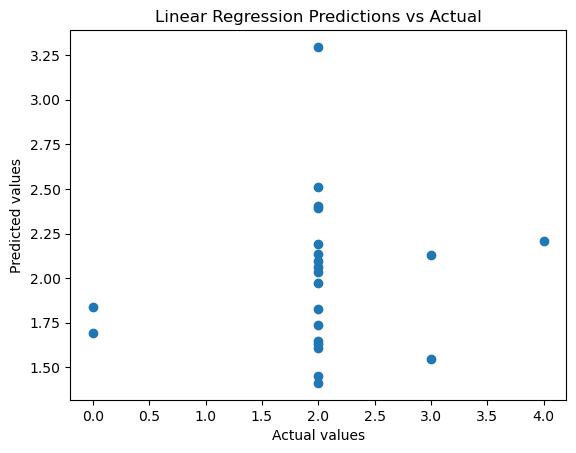

In [11]:
# Scatter plot for linear regression predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Predictions vs Actual')
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_confusion = confusion_matrix(y_test, y_pred_log_reg)
log_reg_classification_report = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Confusion Matrix:\n", log_reg_confusion)
print("Classification Report:\n", log_reg_classification_report)


Logistic Regression Accuracy: 0.5909090909090909
Confusion Matrix:
 [[ 1  0  1  0]
 [ 0 12  4  1]
 [ 0  2  0  0]
 [ 0  1  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           2       0.80      0.71      0.75        17
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.59        22
   macro avg       0.45      0.30      0.35        22
weighted avg       0.71      0.59      0.64        22



C:\Users\sspri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your training data
rf_model.fit(X_train, y_train)

# Predict using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R-squared:", rf_r2)


Random Forest Mean Squared Error: 0.4200321641414142
Random Forest R-squared: 0.33994945634920626


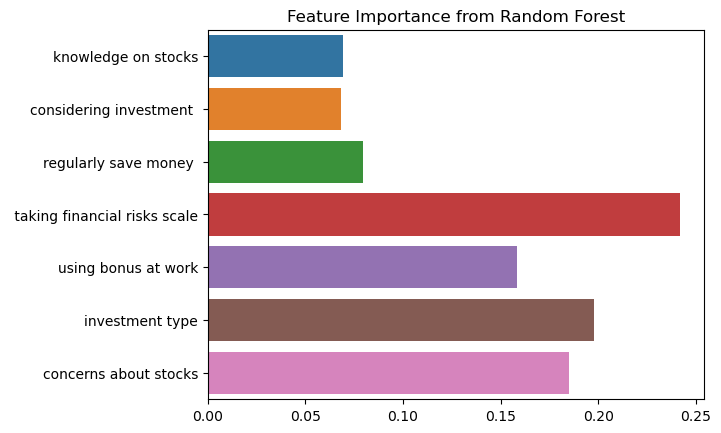

In [12]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data (make sure X_train and y_train are defined)
rf_regressor.fit(X_train, y_train)

# Check feature importance
feature_importances = rf_regressor.feature_importances_
features = X.columns

# Create a bar plot for feature importance
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Convert the target variable into categories (assuming it can be classified)
y_class = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])  # Adjust bins as needed

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(X_train, y_class[:len(X_train)])

# Make predictions
y_nb_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_class[len(X_train):], y_nb_pred)
print(f"Naive Bayes Accuracy: {accuracy_nb}")


Naive Bayes Accuracy: 0.3181818181818182


In [14]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the k-NN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_knn_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_knn_pred)
r2_knn = r2_score(y_test, y_knn_pred)

print(f"k-NN Mean Squared Error: {mse_knn}")
print(f"k-NN R-squared: {r2_knn}")


k-NN Mean Squared Error: 0.5527272727272727
k-NN R-squared: 0.13142857142857145


In [15]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_regressor = SVR(kernel='linear')  # You can try 'rbf', 'poly' kernels as well

# Fit the model
svm_regressor.fit(X_train, y_train)

# Make predictions
y_svm_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_svm_pred)
r2_svm = r2_score(y_test, y_svm_pred)

print(f"SVM Mean Squared Error: {mse_svm}")
print(f"SVM R-squared: {r2_svm}")


SVM Mean Squared Error: 0.8155402991145064
SVM R-squared: -0.2815633271799387


In [16]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_regressor.fit(X_train, y_train)

# Make predictions
y_tree_pred = tree_regressor.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)

print(f"Decision Tree Mean Squared Error: {mse_tree}")
print(f"Decision Tree R-squared: {r2_tree}")


Decision Tree Mean Squared Error: 1.1363636363636365
Decision Tree R-squared: -0.7857142857142858
